<p style="font-size: 22pt; color: green; font-family: 'Times New Roman';">
 Import Modules necessary for running this notebook 
</p>

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import pandas as pd
#
from scipy.stats import gaussian_kde
from matplotlib.colors import LogNorm
from matplotlib.cm import ScalarMappable


In [13]:
import fun_CondProb as fn

<span style="font-family: 'Times New Roman'; font-size: 32px; color: red;"> List available FACTS Data:: <br>
    <span style="font-size: 22px; color: green;"> :: FACTS 1.0 run</span>
</span>

In [3]:
ssp='ssp585'
path = f'/projects/kopp/facts-experiments/221217/coupling.{ssp}/output/'
files=fn.list_files_with_names(path, ["global", "AIS"])

<span style="font-size: 22px; color: green;"> :: FACTS 1.0 20K run</span>

In [4]:
ssp='ssp585'
path20k = f'/scratch/pk695/FACTS/002_fork/facts/experiments-DUMP/experiments.TEST/exp_k14/coupling.{ssp}.20k/output'
files20k=fn.list_files_with_names(path20k, ["global", "AIS"])

<hr style="border: none; height: 2px; background-color: none; border-style: dotted;">
<p style="font-size: 32px; color: green;">&#10145; Choose <span style="color: blue;">AIS</span> data file.</p>

In [5]:
#
start_year=2020; end_year=2300; unit='cm'; station=0

# AIS from the Kopp_14 module.
AIS_k14_path=f'{path20k}/coupling.ssp585.20k.k14ice.kopp14.icesheets_AIS_globalsl.nc'
var = 'k14'; exec(f"{var}_dat, {var}_slc, {var}_time, {var}_lat, {var}_lon = fn.extract_nc_info(AIS_{var}_path, station, unit, start_year, end_year)")

# AIS from the Deconto_16 module.
AIS_d16_path=f'{path20k}/coupling.ssp585.20k.deconto16.deconto16.AIS_AIS_globalsl.nc'
var = 'd16'; exec(f"{var}_dat, {var}_slc, {var}_time, {var}_lat, {var}_lon = fn.extract_nc_info(AIS_{var}_path, station, unit, start_year, end_year)")

# AIS from the IPCC AR5 module.
AIS_ar5_path=f'{path}/coupling.ssp585.ar5AIS.ipccar5.icesheets_AIS_globalsl.nc'
var = 'ar5'; exec(f"{var}_dat, {var}_slc, {var}_time, {var}_lat, {var}_lon = fn.extract_nc_info(AIS_{var}_path, station, unit, start_year, end_year)")

# AIS from the IPCC Deconto_21 module.
AIS_d21_path=f'{path}/coupling.ssp585.deconto21.deconto21.AIS_AIS_globalsl.nc'
var = 'd21'; exec(f"{var}_dat, {var}_slc, {var}_time, {var}_lat, {var}_lon = fn.extract_nc_info(AIS_{var}_path, station, unit, start_year, end_year)")

<hr style="border: none; height: 2px; background-color: none; border-style: dotted;">
<span style="font-family: 'Times New Roman'; font-size: 22pt; color: green;">
    Select Plot data.
</span>
<br>
<span style="font-family: 'Times New Roman'; font-size: 16pt; color: blue;">
    :: Extract all samples from a particulay year 
</span>

In [6]:
def get_axis_data(dum_slc, dum_time, *specific_year):
    return [dum_slc[:, dum_time == t].squeeze() for t in specific_year]

In [7]:
T1=2020; T2=2100; T3=2300;

var = 'k14'; exec(f"{var}_{T1}, {var}_{T2}, {var}_{T3} = get_axis_data({var}_slc, {var}_time, {T1}, {T2}, {T3})")
var = 'd16'; exec(f"{var}_{T1}, {var}_{T2}, {var}_{T3} = get_axis_data({var}_slc, {var}_time, {T1}, {T2}, {T3})")

T1=2020; T2=2100; T3=2150;
var = 'ar5'; exec(f"{var}_{T1}, {var}_{T2}, {var}_{T3} = get_axis_data({var}_slc, {var}_time, {T1}, {T2}, {T3})")
var = 'd21'; exec(f"{var}_{T1}, {var}_{T2}, {var}_{T3} = get_axis_data({var}_slc, {var}_time, {T1}, {T2}, {T3})")

Text(0.95, 0.95, 'k14')

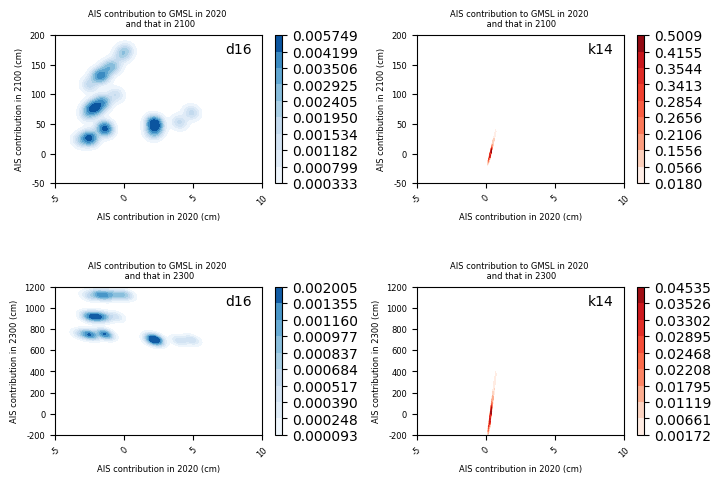

In [8]:
fig = plt.figure(figsize=(8, 15))
gs = gridspec.GridSpec(5, 2, figure=fig);  
plt.subplots_adjust(wspace=0.4, hspace=0.7)
# ==============================================================================================================
# PLOT left panel.<
ax = fig.add_subplot(gs[0, 0])
sns.kdeplot(x=d16_2020, y=d16_2100, fill=True, cmap="Blues", cbar=True)
#
# cbar = ax.collections[0].colorbar
# cbar.set_norm(LogNorm(vmin=np.min(d16_2020), vmax=np.max(d16_2300)))
#
ax.set_title("AIS contribution to GMSL in 2020 \n and that in 2100", fontsize=6)
ax.set_xlabel("AIS contribution in 2020 (cm)", fontsize=6)
ax.set_ylabel("AIS contribution in 2100 (cm)", fontsize=6)
ax.set_xlim(-5, 10)
ax.set_ylim(-50, 200)
ax.set_xticks(np.arange(-5, 11, 5));  ax.set_xticklabels(np.arange(-5, 11, 5),fontsize=6, rotation=45);
ax.set_yticks(np.arange(-50, 201, 50));  ax.set_yticklabels(np.arange(-50, 201, 50),fontsize=6) ;
ax.text(0.95, 0.95, 'd16', horizontalalignment='right', verticalalignment='top', transform=ax.transAxes, fontsize=10)


# PLOT right panel.<
ax = fig.add_subplot(gs[0, 1])
sns.kdeplot(x=k14_2020, y=k14_2100, fill=True, cmap="Reds", cbar=True)
ax.set_title("AIS contribution to GMSL in 2020 \n and that in 2100", fontsize=6)
ax.set_xlabel("AIS contribution in 2020 (cm)", fontsize=6)
ax.set_ylabel("AIS contribution in 2100 (cm)", fontsize=6)
ax.set_xlim(-5, 10)
ax.set_ylim(-50, 200)
ax.set_xticks(np.arange(-5, 11, 5));  ax.set_xticklabels(np.arange(-5, 11, 5),fontsize=6, rotation=45);
ax.set_yticks(np.arange(-50, 201, 50));  ax.set_yticklabels(np.arange(-50, 201, 50),fontsize=6) ;
ax.text(0.95, 0.95, 'k14', horizontalalignment='right', verticalalignment='top', transform=ax.transAxes, fontsize=10)


# PLOT bottom left panel.<
ax = fig.add_subplot(gs[1, 0])
sns.kdeplot(x=d16_2020, y=d16_2300, fill=True, cmap="Blues", cbar=True)
ax.set_title("AIS contribution to GMSL in 2020 \n and that in 2300", fontsize=6)
ax.set_xlabel("AIS contribution in 2020 (cm)", fontsize=6)
ax.set_ylabel("AIS contribution in 2300 (cm)", fontsize=6)
ax.set_xlim(-5, 10)
ax.set_ylim(-200, 1200)
ax.set_xticks(np.arange(-5, 11, 5));  ax.set_xticklabels(np.arange(-5, 11, 5),fontsize=6, rotation=45);
ax.set_yticks(np.arange(-200, 1201, 200));  ax.set_yticklabels(np.arange(-200, 1201, 200),fontsize=6) ;
ax.text(0.95, 0.95, 'd16', horizontalalignment='right', verticalalignment='top', transform=ax.transAxes, fontsize=10)

# PLOT bottom right panel.<
ax = fig.add_subplot(gs[1, 1])
sns.kdeplot(x=k14_2020, y=k14_2300, fill=True, cmap="Reds", cbar=True)
ax.set_title("AIS contribution to GMSL in 2020 \n and that in 2300", fontsize=6)
ax.set_xlabel("AIS contribution in 2020 (cm)", fontsize=6)
ax.set_ylabel("AIS contribution in 2300 (cm)", fontsize=6)
ax.set_xlim(-5, 10)
ax.set_ylim(-50, 200)
ax.set_xticks(np.arange(-5, 11, 5));  ax.set_xticklabels(np.arange(-5, 11, 5),fontsize=6, rotation=45);
ax.set_yticks(np.arange(-200, 1201, 200));  ax.set_yticklabels(np.arange(-200, 1201, 200),fontsize=6) ;
ax.text(0.95, 0.95, 'k14', horizontalalignment='right', verticalalignment='top', transform=ax.transAxes, fontsize=10)



<hr style="border: none; height: 2px; background-color: none; border-style: dotted;">

<span style="font-size: 14pt; color: blue; font-family: 'Times New Roman'; background-color: yellow;"> 
    To estimate the range of density values produced by KDE, use tools in scipy. Has more control KDE calculation. Involves manually computing the KDE using the same data and then examining the range of density values produced.
</span>
<br>
<ol>
    <li> Compute the KDE using scipy.stats.gaussian_kde. </li>
    <li> Evaluate the KDE over a grid that covers your data range. </li>
    <li> Find the maximum and minimum density values from this evaluation. </li>
</ol>

TypeError: log_plot() takes 21 positional arguments but 22 were given

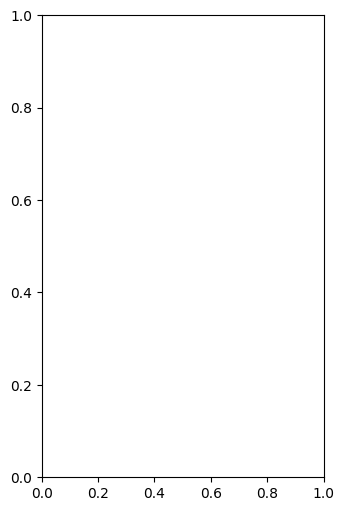

In [14]:
#
fig = plt.figure(figsize=(8, 6))
gs = fig.add_gridspec(1, 2)
ax = fig.add_subplot(gs[0, 1])
#
VAR1=k14_2020
VAR2=k14_2100 
VAR_name='k14'
TVAR1 = 2020
TVAR2 = 2100



fn.log_plot(VAR1,VAR2,VAR_name,TVAR2,TVAR2,-5, 10, 100,
            -50, 200, 100,1e-3,'Reds', 
            10, -5, 1, 10, -50, 1, 50, 'AIS',ax)

In [ ]:
VAR1=k14_2020
VAR2=k14_2100
#
fig = plt.figure(figsize=(8, 6))
gs = fig.add_gridspec(1, 2)
ax = fig.add_subplot(gs[0, 1])

# Compute the KDE
kde = gaussian_kde([VAR1, VAR2])
#
#
xgrid = np.linspace(-5, 10, 100)  # Adjusted to match axis limits
ygrid = np.linspace(-50, 200, 100)  # Adjusted to match axis limits
X, Y = np.meshgrid(xgrid, ygrid)

# Evaluate the KDE on this grid
Z = kde([X.flatten(), Y.flatten()]).reshape(X.shape)
#
kde_min = Z.min()
kde_max = Z.max()
kde_min = max(kde_min, 1e-3)
kde_max = max(kde_max, kde_min * 10)
# Use logarithmic norm
norm = LogNorm(vmin=kde_min, vmax=kde_max)

# Plot the KDE
cax = ax.pcolormesh(X, Y, Z, shading='auto', norm=norm, cmap='Reds')


# Create the color bar
cbar = fig.colorbar(cax, ax=ax)
num_ticks = 10
tick_values = np.logspace(np.log10(kde_min), np.log10(kde_max), num=num_ticks)
cbar.set_ticks(tick_values)
# cbar.set_ticklabels(['{:.4f}'.format(tick) for tick in tick_values])
cbar.set_ticklabels(['{:.4e}'.format(tick) if tick < 0.0001 else '{:.4f}'.format(tick) for tick in tick_values])


# Set titles and labels
ax.set_title("AIS contribution to GMSL in 2020 \n and that in 2100", fontsize=6)
ax.set_xlabel("AIS contribution in 2020 (cm)", fontsize=6)
ax.set_ylabel("AIS contribution in 2100 (cm)", fontsize=6)
# Set axis limits and ticks
ax.set_xlim(-5, 10)
ax.set_ylim(-50, 200)
ax.set_xticks(np.arange(-5, 11, 5))
ax.set_xticklabels(np.arange(-5, 11, 5), fontsize=6, rotation=45)
ax.set_yticks(np.arange(-50, 201, 50))
ax.set_yticklabels(np.arange(-50, 201, 50), fontsize=6)
# Add text
ax.text(0.95, 0.95, 'k14', horizontalalignment='right', verticalalignment='top', transform=ax.transAxes, fontsize=10)

plt.show()
